<a href="https://colab.research.google.com/github/bhojaram/TheSparkFoundation/blob/main/Decision_Tree(Task_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP The Spark Foundation
# Task#6: Prediction using Decision Tree Algorithm
# Author : Bhojaram  SA

In [ ]:
# Importing the required Libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import Image

# Reading the csv file

In [ ]:
df = pd.read_csv('D:\Internship\TheSparkFoundation\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Rename the columns name

In [ ]:
df = df.rename(columns={
    'SepalLengthCm': 'Sepal Length',
    'SepalWidthCm': 'Sepal Width',
    'PetalLengthCm': 'Petal Length',
    'PetalWidthCm': 'Petal Width'
})


# Data pre-processing and EDA

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().count()

Id              150
Sepal Length    150
Sepal Width     150
Petal Length    150
Petal Width     150
Species         150
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal Length  150 non-null    float64
 2   Sepal Width   150 non-null    float64
 3   Petal Length  150 non-null    float64
 4   Petal Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Remove the column 'Id'

In [ ]:
df = df.drop(columns=['Id'])
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.shape

(150, 5)

# Pair wise plot for visualization

C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

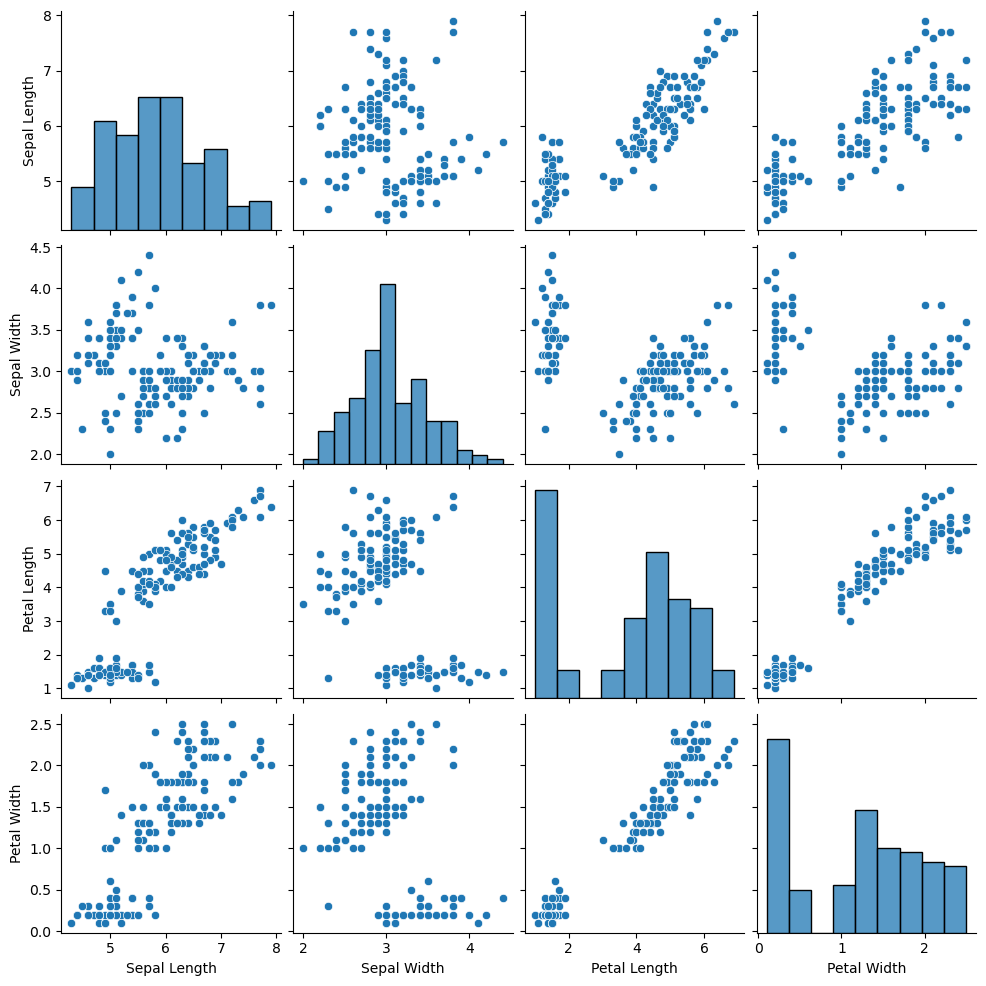

In [ ]:
# Input data Visualization
sns.pairplot(df)

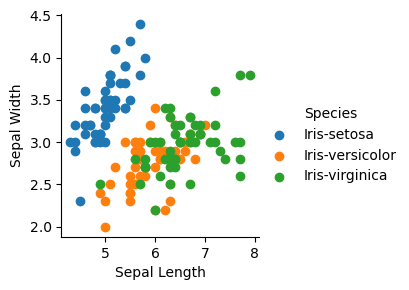

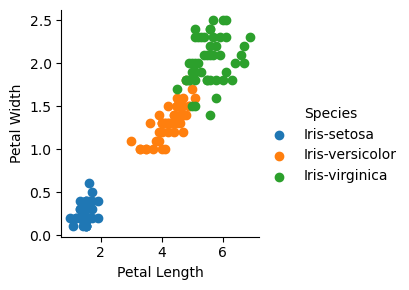

In [ ]:
 # Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()

# Define input features and target feature

In [ ]:
#X is the independent feature and y is the dependent feature

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test set

In [ ]:
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
y_test.shape, X_test.shape

((45,), (45, 4))

# Scaling the dataset

In [ ]:
#Initialize the StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Decision Tree model and fit it

In [ ]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

# Model prediction and result comparison

In [ ]:
y_pred = tree_classifier.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


# Visualization of Decision Tree on training data

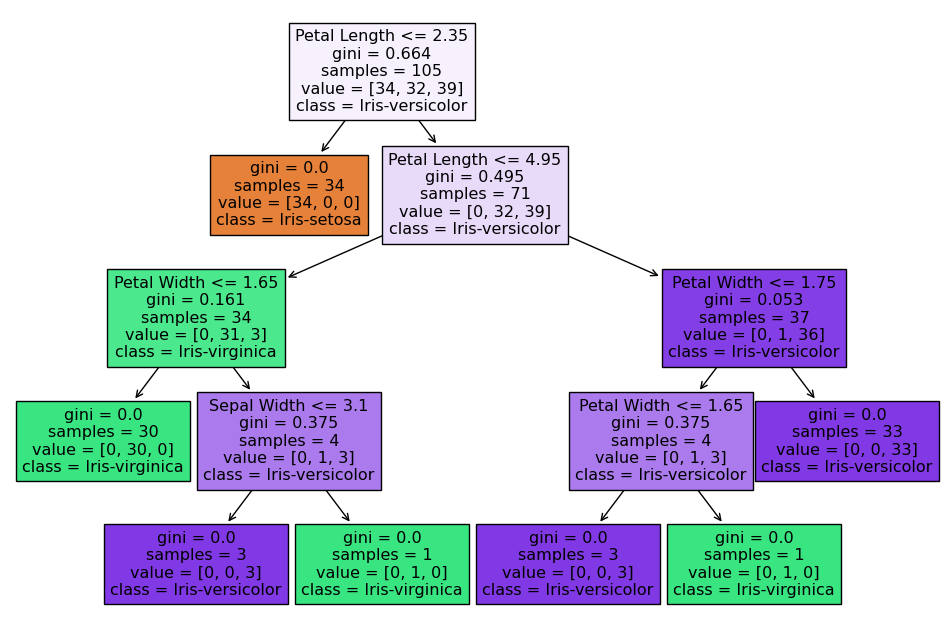

In [ ]:
from sklearn.tree import  plot_tree
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
target_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

# Performance metrics of model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 0.9777777777777777
Precision: 0.9796296296296295
Recall: 0.9777777777777777
F1-score: 0.9779434092477569


# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

# Prediction on sample data

In [ ]:
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))

Output =  ['Iris-setosa']


# Conclusion
**Accuracy: The accuracy of the model is approximately 97.78%.This indicates that it correctly predicts the class labels for about 97.78% of the instances in the test set.**
**

**Precision: The precision of the model is approximately 97.96%, which means that when the model predicts a class label, it is correct about 97.96% of the time. In other words, out of all instances predicted as positive by the model, about 97.96% are true positives.**


**Recall: The recall of the model is also approximately 97.78%, indicating that the model correctly identifies about 97.78% of all actual positive instances in the test set.**


**F1-score: The F1-score, which is the harmonic mean of precision and recall, is approximately 97.79%. It provides a balance between precision and recall, and in this case, it indicates that the model performs well in terms of both precision and recall.**